# Materials and code to create images of the LORA paper and annex (cyanobacteria)

In [1]:
%matplotlib inline
from pylab import *

In [2]:
rcParams['figure.figsize'] = (8,8)

In [3]:
import glob
import os
from tqdm import tqdm
from sequana import *
from sequana import FastA, FastQ
from sequana.pacbio import PacbioSubreads

In [4]:
import importlib
import utils  # your module
importlib.reload(utils)

<module 'utils' from '/home/cokelaer/Work/1_Projects/LORA/paper_LORA/utils.py'>

# Data Download

In [5]:
utils.download_cyanobacteria_data()

In [6]:
os.makedirs("paper_images/cyanobacteria", exist_ok=True)


## Raw data (fastq) stats  -- information for the annex and table

In [7]:
f = FastQ('data/cyanobacteria/PCC6711.fastq.gz')
ss = f.stats()
print(ss)
coverage = ss['sum_read_length'] / utils.genome_size['cyanobacteria']
print(f"coverage: {coverage}")

{'N': 1572000, 'mean_length': np.float64(1945.3325241730279), 'total_length': 3058062728, 'N50': np.int64(2643), 'L50': np.int64(314427), 'min_length': 1, 'max_length': 85357, 'mean_read_length': np.float64(1945.3325241730279), 'sum_read_length': 3058062728}
coverage: 695.0142563636364


## Figure in the annex

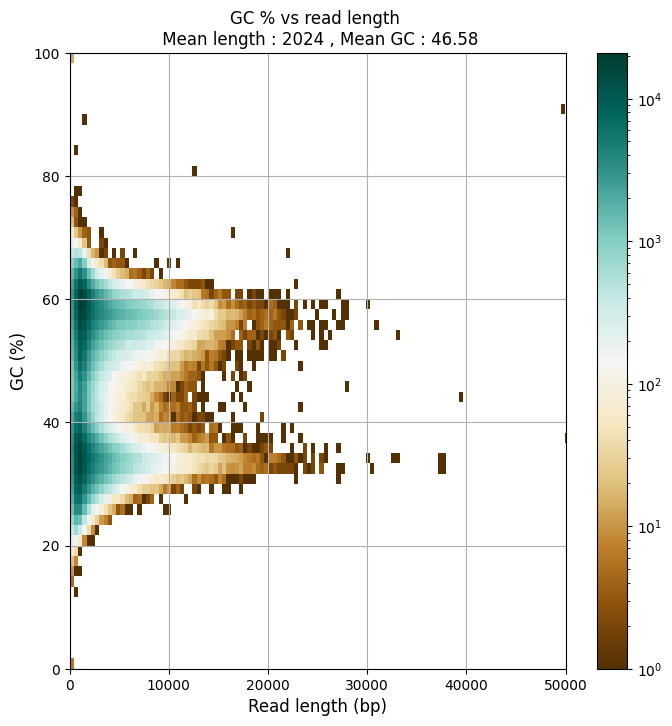

In [8]:
f.plot_GC_read_len(maxreads=1000000)
xlim([0,50000])
utils.saveall("paper_images/cyanobacteria/GC_vs_length")

## Repeats -- figure in the annex

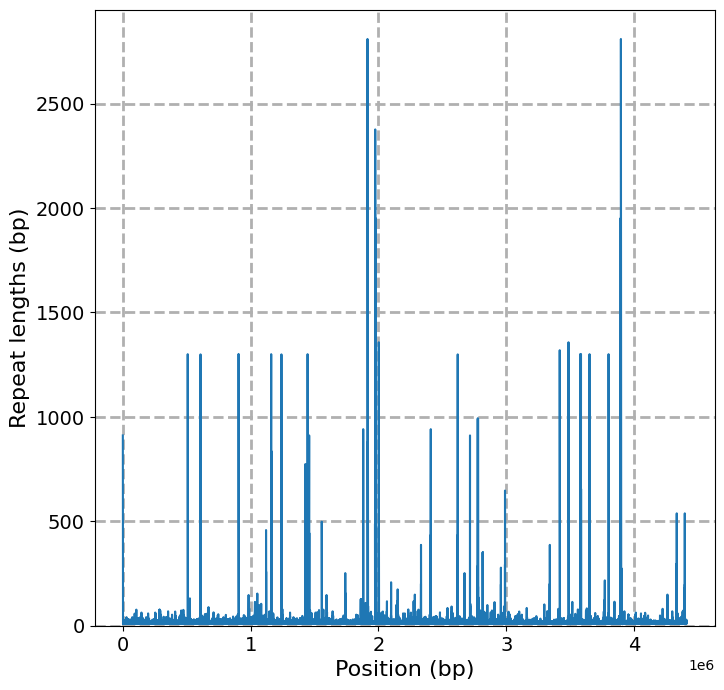

In [9]:
r = Repeats("GoldStandard/cyanobacteria.fa")
r.threshold = 10
r.plot()
grid(True, lw=2, ls="--")
xlabel("Position (bp)", fontsize=16)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel("Repeat lengths (bp)", fontsize=16)
utils.saveall("paper_images/cyanobacteria/repeats")

# Some stats on GC and length

In [10]:
f = FastA("GoldStandard/cyanobacteria.fa")
L = f.get_stats()['total_length']
GC = f.GC_content()
print(L, round(GC,1))

4409737 56.8


# BUSCO meta analysis for the Results section

In [14]:
bf = utils.BUSCOFactory()
assert len(bf.busco_df) > 0, len(bf.busco_df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 353.42it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


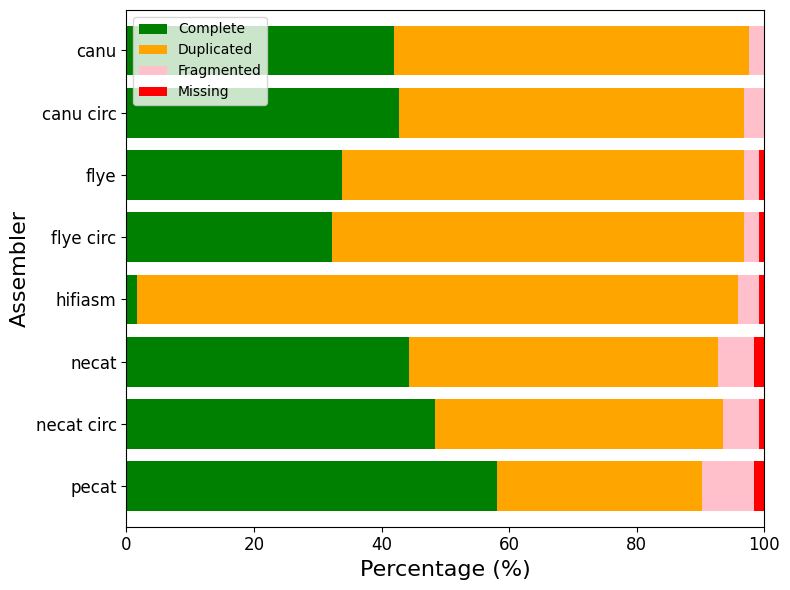

In [15]:
bf.plot_busco_summary_bar("cyanobacteria")
utils.saveall("paper_images/cyanobacteria/busco_cyanobacteria")


# Checkm meta analysis (not used but useful)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


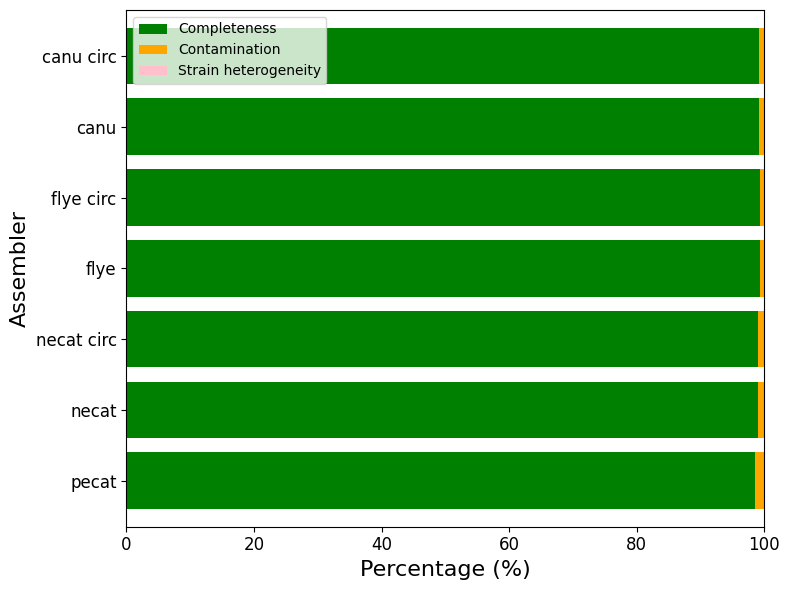

In [16]:
cm = utils.CheckMFactory()
cm.plot_checkm_summary_bar("cyanobacteria")
utils.saveall("paper_images/cyanobacteria/checkm_cyanobacteria")


# table contigs

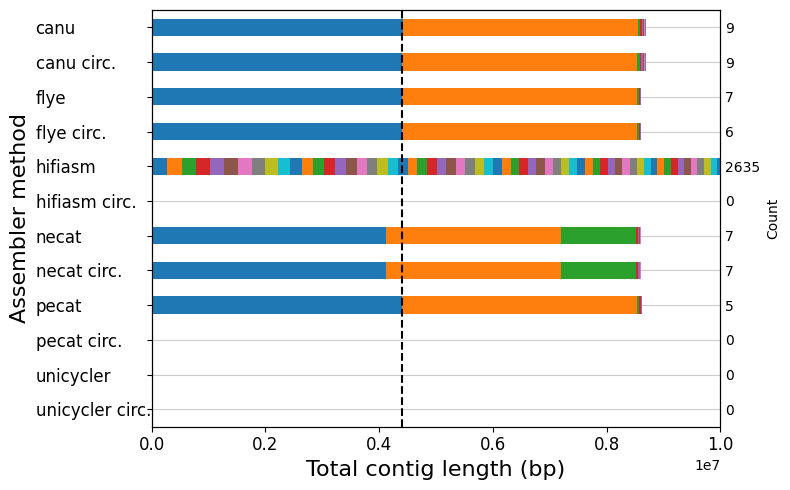

In [18]:
pl = utils.PlotContigs("cyanobacteria")
pl.plot_assembly_results()
xlim([0,1e7])
utils.saveall("paper_images/cyanobacteria/cyanobacteria_contigs_summary")